In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer  # !pip install factor_analyzer

In [13]:

mydata = pd.read_csv('/content/drive/MyDrive/MAR6669-data/EFA.csv')



In [14]:
mydata.head()

,Price,Safety,Exterior_Looks,Space_comfort,Technology,After_Sales_Service,Resale_Value,Fuel_Type,Fuel_Efficiency,Color,Maintenance,Test_drive,Product_reviews,Testimonials
0,4,4,5,4,3,4,5,4,4,2,4,2,4,3
1,3,5,3,3,4,4,3,4,3,4,3,2,2,2
2,4,4,3,4,5,5,5,4,5,4,5,4,4,3
3,4,4,4,3,3,4,5,5,4,4,4,2,5,3
4,5,5,4,4,5,4,5,3,4,5,5,5,5,2


In [15]:
mydata.shape

(90, 14)

In [23]:
mydata.columns

Index(['Price', 'Safety', 'Exterior_Looks', 'Space_comfort', 'Technology',
       'After_Sales_Service', 'Resale_Value', 'Fuel_Type', 'Fuel_Efficiency',
       'Color', 'Maintenance', 'Test_drive', 'Product_reviews',
       'Testimonials'],
      dtype='object')

<!-- # how does fa.get_eigenvalues() work?
correlation_matrix = mydata.corr()
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print("Eigenvalues:",sorted(eigenvalues)[::-1]) -->

In [16]:
# Extract (and rotate) factors
Nfacs = 4  # This is for four factors
fa = FactorAnalyzer(n_factors=Nfacs, rotation="varimax") # Set whether rotation and its type here
fa.fit(mydata) # Fit the factor model


FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [17]:
loadings = fa.loadings_
print(np.shape(loadings))
print(loadings)

(14, 4)
[[ 5.34735987e-01  1.09819036e-01 -3.19016988e-03 -5.01987904e-02]
 [-2.71602979e-01  3.55607452e-01 -1.75105853e-01  6.04541417e-02]
 [-4.91521487e-03  4.48939036e-02  1.92741178e-01 -5.44144699e-01]
 [-2.82902484e-02  7.52957582e-01  2.19524020e-01 -2.22664637e-01]
 [ 4.29661291e-02  3.49019338e-01  1.03184036e-01  1.37153231e-02]
 [ 1.63276231e-01  5.27968786e-01  1.02347468e-01  1.23956010e-01]
 [ 7.23570818e-01 -1.42859159e-01 -1.37285620e-01  5.80725629e-02]
 [ 4.44773494e-02  5.56858387e-01 -1.23338702e-04 -6.90659000e-02]
 [ 4.92074974e-01  2.34734582e-01  2.99063630e-01  2.91384300e-01]
 [ 1.97920700e-01 -2.87118742e-02  2.65965677e-01  7.06007733e-01]
 [ 6.02593138e-01  7.87141808e-02  1.10756057e-01  2.33411449e-01]
 [ 9.81866591e-02  1.50255378e-01  4.06842109e-01 -1.83456720e-02]
 [ 3.36044005e-01  1.44764149e-01  4.28927419e-01  3.22763832e-02]
 [-2.28305437e-01 -7.62752667e-03  6.76960087e-01  1.04855517e-03]]


In [18]:
scores = fa.transform(mydata)
print(np.shape(scores))
print(scores)

(90, 4)
[[ 6.84042406e-01 -3.77293720e-01 -8.29285478e-01 -1.55416983e+00]
 [-1.31940097e+00 -6.04611018e-01 -2.17212189e+00  9.93007156e-01]
 [ 1.09264898e+00  4.16128810e-01 -3.78641211e-01  6.94255792e-01]
 [ 7.30055548e-01 -8.34150774e-01 -7.55206845e-01  2.25665465e-01]
 [ 1.36949780e+00  2.34995876e-03 -5.33379184e-01  6.61454329e-01]
 [-7.93554703e-01 -6.94003513e-01 -1.43654547e+00 -1.16565146e+00]
 [-9.96243472e-01  1.93508467e-01  3.31522296e-02  8.49456501e-01]
 [ 9.02970547e-01 -4.26402428e-01  1.10069923e-01 -6.57930380e-02]
 [ 8.31248939e-01 -9.44087119e-02 -2.75759717e-02 -3.83523154e-01]
 [ 4.12381562e-01 -6.42519071e-01 -7.31348249e-01  1.35844519e+00]
 [ 8.19617528e-01 -9.98948363e-02 -6.53123640e-02  3.45495428e-01]
 [ 1.07013334e+00 -8.75536560e-01  7.22336777e-01  7.88475585e-01]
 [ 1.02209135e+00 -3.68454607e-01 -3.45489275e-01 -1.57434889e+00]
 [-3.83221018e-01  5.92917145e-01 -1.16468118e+00  1.20670894e+00]
 [ 1.06308507e+00 -1.35497078e+00  5.93863203e-01  4.2

## Name and interpret the factors

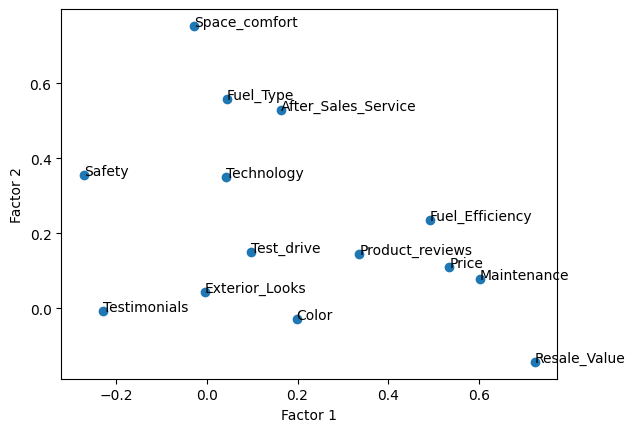

In [19]:
# Plot factor loadings of the first two factors
fig, ax = plt.subplots()
ax.scatter(loadings[:, 0], loadings[:, 1])
for i, txt in enumerate(mydata.columns):
    ax.annotate(txt, (loadings[i, 0], loadings[i, 1]))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()


In [21]:
# Create a DataFrame with custom row and column names
loadings_df = pd.DataFrame(loadings.round(3),
                           index=mydata.columns,
                           columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])

print(loadings_df)

factor_names = ["Econ. Value", "Functional Benefits", "Credibility","Aesthetics"]

                     Factor 1  Factor 2  Factor 3  Factor 4
Price                   0.535     0.110    -0.003    -0.050
Safety                 -0.272     0.356    -0.175     0.060
Exterior_Looks         -0.005     0.045     0.193    -0.544
Space_comfort          -0.028     0.753     0.220    -0.223
Technology              0.043     0.349     0.103     0.014
After_Sales_Service     0.163     0.528     0.102     0.124
Resale_Value            0.724    -0.143    -0.137     0.058
Fuel_Type               0.044     0.557    -0.000    -0.069
Fuel_Efficiency         0.492     0.235     0.299     0.291
Color                   0.198    -0.029     0.266     0.706
Maintenance             0.603     0.079     0.111     0.233
Test_drive              0.098     0.150     0.407    -0.018
Product_reviews         0.336     0.145     0.429     0.032
Testimonials           -0.228    -0.008     0.677     0.001


In [22]:
loadings_df.columns = factor_names
print(loadings_df)

                     Econ. Value  Functional Benefits  Credibility  Aesthetics
Price                      0.535                0.110       -0.003      -0.050
Safety                    -0.272                0.356       -0.175       0.060
Exterior_Looks            -0.005                0.045        0.193      -0.544
Space_comfort             -0.028                0.753        0.220      -0.223
Technology                 0.043                0.349        0.103       0.014
After_Sales_Service        0.163                0.528        0.102       0.124
Resale_Value               0.724               -0.143       -0.137       0.058
Fuel_Type                  0.044                0.557       -0.000      -0.069
Fuel_Efficiency            0.492                0.235        0.299       0.291
Color                      0.198               -0.029        0.266       0.706
Maintenance                0.603                0.079        0.111       0.233
Test_drive                 0.098                0.15